train - 1937개
test - 581개


In [127]:
#가위바위보 만들기
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [128]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized")
    
    #파일마다 모두 28x28 사이즈로 바꿔야 한다.
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg을 읽어들여서
image_dir_path = os.getenv("HOME")+ "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지resize 완료!")


697  images to be resized
697 images resized.
가위 이미지resize 완료!


In [129]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path2)
print("바위 이미지 resize완료!")

601  images to be resized
601 images resized.
바위 이미지 resize완료!


In [130]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path3)
print("보 이미지 resize완료!")

639  images to be resized
639 images resized.
보 이미지 resize완료!


In [131]:
import numpy as np

def load_data(img_path, number_of_data=1937): #가위바위보 이미지 개수 총합
    # 가위 : 0, 바위: 1, 보: 2
    img_size = 28
    color=3
    #이미지 데이터와 라벨(가위 :0, 바위: 1, 보: 2) 데이터를 담을 행렬(matrix)
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx =0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]= img #데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 # 가위:0
        idx = idx+1
    
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]= img #데이터 영역에 이미지 행렬을 복사
        labels[idx]=1 # 바위:1
        idx = idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]= img #데이터 영역에 이미지 행렬을 복사
        labels[idx]=2 # 보:2
        idx = idx+1    
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,1937)
x_train_norm = x_train/255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1937 입니다.
x_train shape: (1937, 28, 28, 3)
y_train shape: (1937,)


라벨:  0


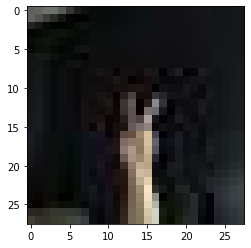

In [132]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [133]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=80
n_channel_2=32
n_channel_3=50
n_dense=16
n_train_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu')) #층add
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  9
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 26, 26, 80)        2240      
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 13, 13, 80)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 11, 11, 32)        23072     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 3, 3, 50)          14450     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 1, 1, 50)          0         
_________________________________________________________________
flatten_21 (Flatten)         

In [134]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/30
61/61 [==============================] - 1s 5ms/step - loss: 1.4373 - accuracy: 0.3647
Epoch 2/30
61/61 [==============================] - 0s 4ms/step - loss: 1.0097 - accuracy: 0.5139
Epoch 3/30
61/61 [==============================] - 0s 4ms/step - loss: 0.8217 - accuracy: 0.6298
Epoch 4/30
61/61 [==============================] - 0s 4ms/step - loss: 0.6290 - accuracy: 0.7523
Epoch 5/30
61/61 [==============================] - 0s 4ms/step - loss: 0.5259 - accuracy: 0.7848
Epoch 6/30
61/61 [==============================] - 0s 4ms/step - loss: 0.4534 - accuracy: 0.8272
Epoch 7/30
61/61 [==============================] - 0s 4ms/step - loss: 0.3646 - accuracy: 0.8626
Epoch 8/30
61/61 [==============================] - 0s 4ms/step - loss: 0.2997 - accuracy: 0.8894
Epoch 9/30
61/61 [==============================] - 0s 4ms/step - loss: 0.2845 - accuracy: 0.9192
Epoch 10/30
61/61 [==============================] - 0s 4ms/step - loss: 0.2127 - accuracy: 0.9363
Epoch 11/30
61/61 [

194 images to be resized.
194 images resized.
테스트 가위이미지 resize 완료!!
194 images to be resized.
194 images resized.
테스트 바위이미지 resize 완료!!
193 images to be resized.
193 images resized.
테스트 보 이미지 resize 완료!!
테스트데이터(x_test)의 이미지 개수는 581 입니다.
x_test shape: (583, 28, 28, 3)
y_test shape: (583,)
라벨:  0


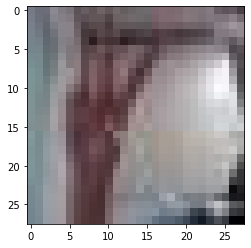

In [135]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        
    print(len(images), "images resized.")
      

image_dir_path1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path1)
print("테스트 가위이미지 resize 완료!!")

image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path2)
print("테스트 바위이미지 resize 완료!!")
    
image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path3)
print("테스트 보 이미지 resize 완료!!")

def load_data(img_path, number_of_data=583):  # 가위바위보 이미지 개수 총합에 주의하세요.

    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx = 0
    
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path,583)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


plt.imshow(x_test[22])
print('라벨: ', y_test[22])

In [136]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 1.4440 - accuracy: 0.6844
test_loss: 1.4440062046051025 
test_accuracy: 0.6843910813331604
